
Task: Analyze the Boston House Prices dataset using feature selection and machine learning.

Step 1: Loading Data and Importing Libraries

In [208]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data=pd.read_csv("/boston_house_prices.csv")

In [209]:
#Target variable = Price (Index value is column -1)
#Splitting the data set and saving all the potential feature variables in 'features'
features=data.iloc[:,:-1]

2. Feature Selection

<Axes: >

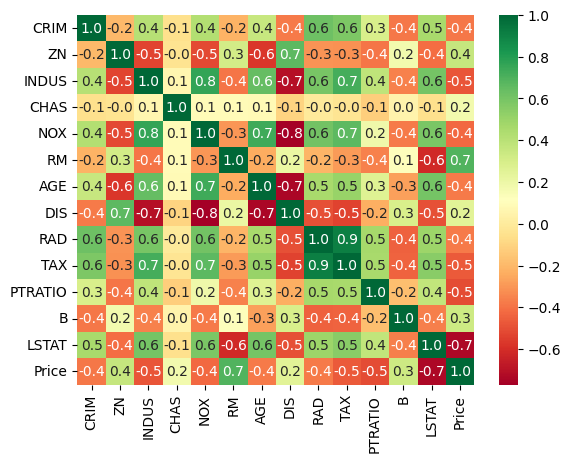

In [210]:
#To select the features, using Heat Map we first study the correlation between the variables.
sns.heatmap(data.corr(), annot=True, fmt='.1f', cmap='RdYlGn')

We begin correlation analysis of each feature variable with our Target variable (Price) using scatterplots

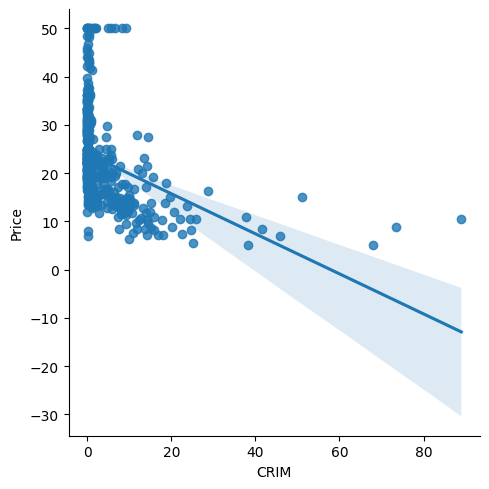

In [211]:
sns.lmplot(x="CRIM", y="Price", data=data);

CRIM has a **NO** orrelation with the target variable.

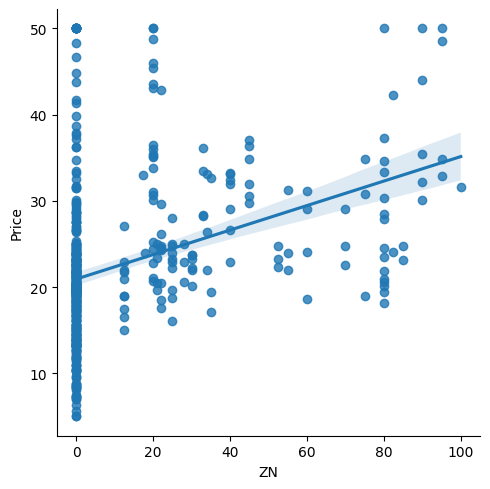

In [212]:
sns.lmplot(x="ZN", y="Price", data=data);

ZN has a faint **positive** correlation with the target variable.

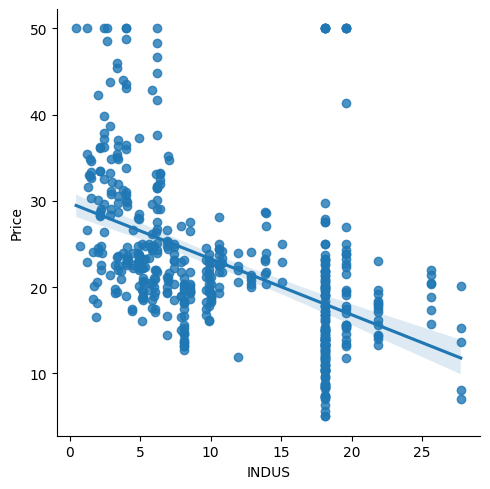

In [213]:
sns.lmplot(x="INDUS", y="Price", data=data);

INDUS has a negative correlation with the target variable.

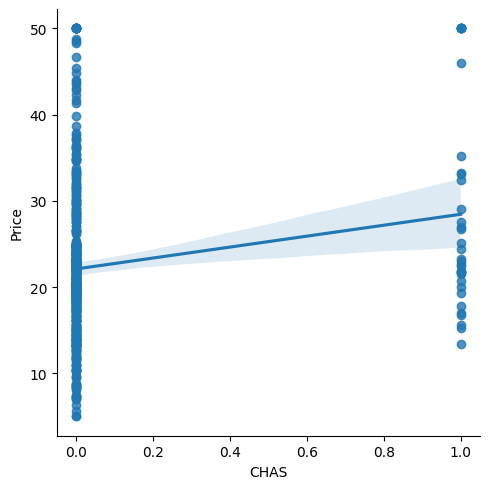

In [214]:
sns.lmplot(x="CHAS", y="Price", data=data);


CHAS has a **NO** correlation with the target variable.

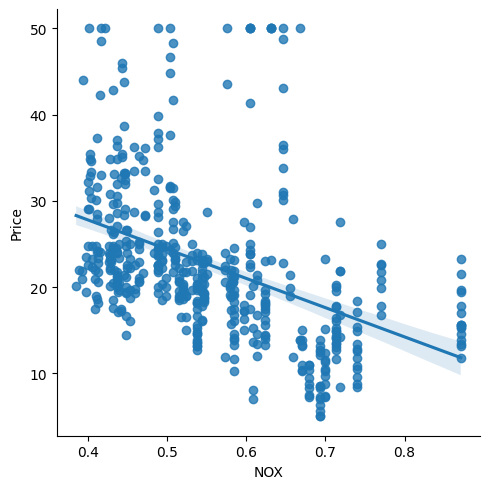

In [215]:
sns.lmplot(x="NOX", y="Price", data=data);

NOX has **negative** correlation with the target variable.

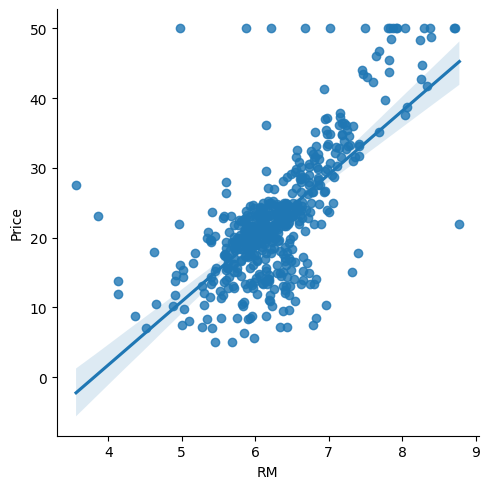

In [216]:
sns.lmplot(x="RM", y="Price", data=data);

RM has **positive** correlation with the target variable.

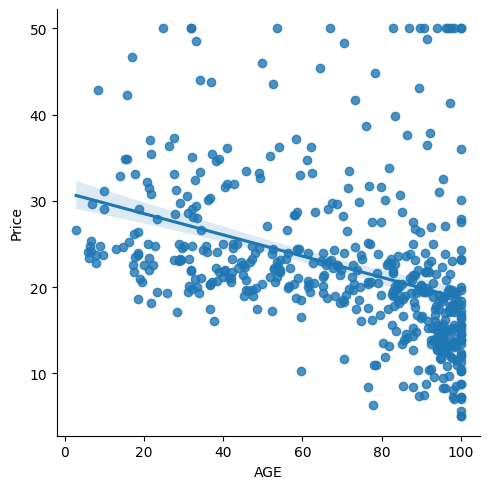

In [217]:
sns.lmplot(x="AGE", y="Price", data=data);

AGE has **negative** correlation with the target variable.

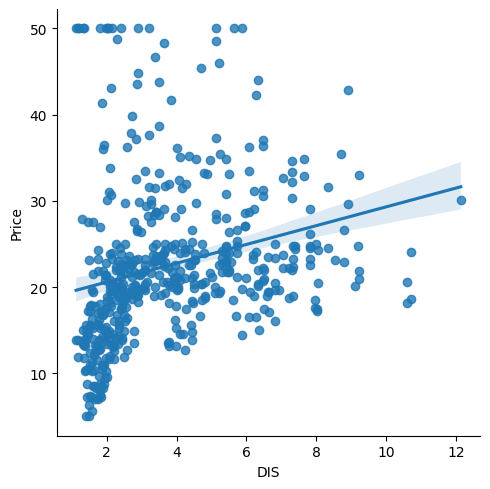

In [218]:
sns.lmplot(x="DIS", y="Price", data=data);

DIS has **positive** correlation with the target variable.

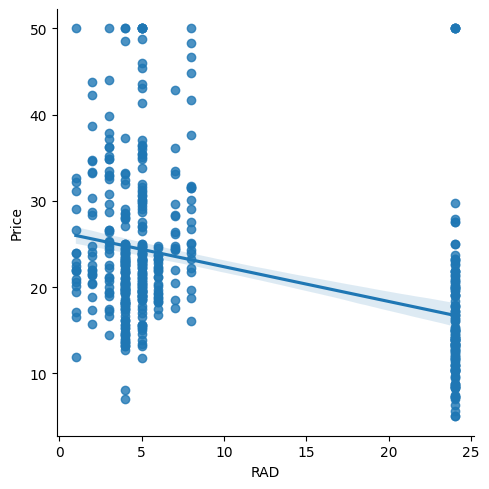

In [219]:
sns.lmplot(x="RAD", y="Price", data=data);

RAD has **NO** correlation with the target variable.

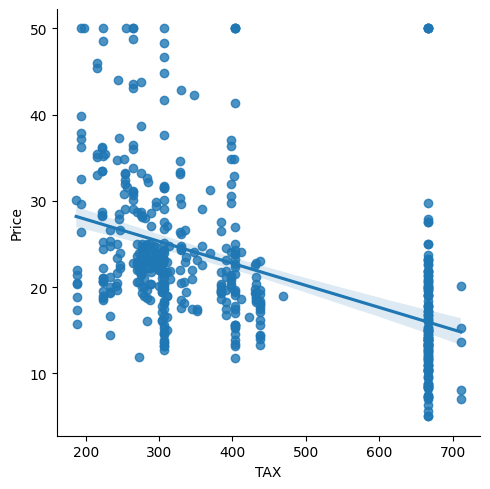

In [220]:
sns.lmplot(x="TAX", y="Price", data=data);

TAX has extremely less **negative** correlation with the target variable.

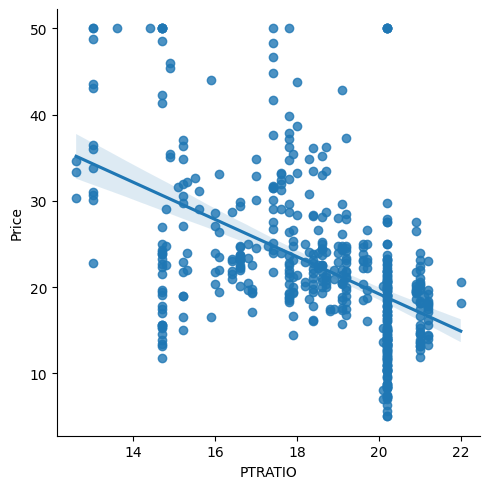

In [221]:
sns.lmplot(x="PTRATIO", y="Price", data=data);

PTRATIO has **negative** correlation with the target variable.

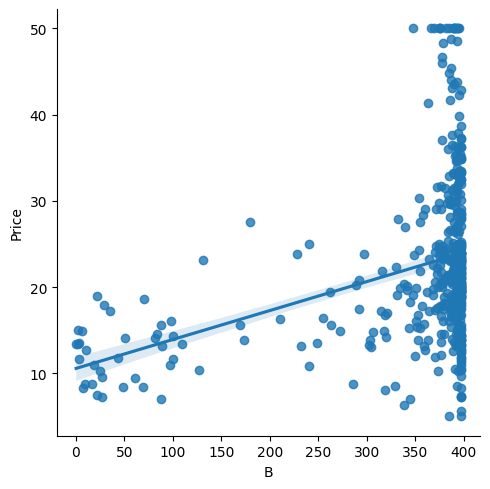

In [222]:
sns.lmplot(x="B", y="Price", data=data);

B has **NO** correlation with the target variable.

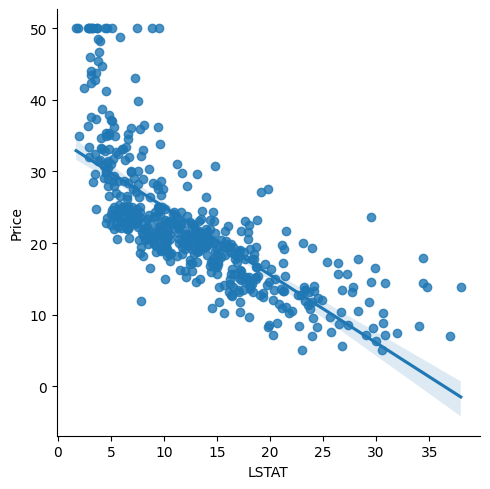

In [223]:
sns.lmplot(x="LSTAT", y="Price", data=data);

LSTAT has extremely **negative** correlation with the target variable.

In [224]:
#Dropping CRIM, CHAS, RAD and B since they have no correlation with the Dependent variable Price
columns_to_drop = ['CRIM', 'RAD', 'B', 'CHAS']
features1 = features.drop(columns=columns_to_drop)
print(features1)

       ZN  INDUS    NOX     RM   AGE     DIS  TAX  PTRATIO  LSTAT
0    18.0   2.31  0.538  6.575  65.2  4.0900  296     15.3   4.98
1     0.0   7.07  0.469  6.421  78.9  4.9671  242     17.8   9.14
2     0.0   7.07  0.469  7.185  61.1  4.9671  242     17.8   4.03
3     0.0   2.18  0.458  6.998  45.8  6.0622  222     18.7   2.94
4     0.0   2.18  0.458  7.147  54.2  6.0622  222     18.7   5.33
..    ...    ...    ...    ...   ...     ...  ...      ...    ...
501   0.0  11.93  0.573  6.593  69.1  2.4786  273     21.0   9.67
502   0.0  11.93  0.573  6.120  76.7  2.2875  273     21.0   9.08
503   0.0  11.93  0.573  6.976  91.0  2.1675  273     21.0   5.64
504   0.0  11.93  0.573  6.794  89.3  2.3889  273     21.0   6.48
505   0.0  11.93  0.573  6.030  80.8  2.5050  273     21.0   7.88

[506 rows x 9 columns]


Checking for multicollinearity between the less negatively correlated (TAX:, INDUS)




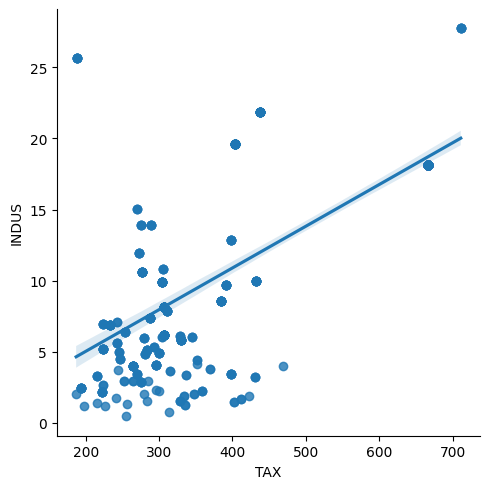

In [225]:
sns.lmplot(x="TAX", y="INDUS", data=data);

Highly correlated with each other and the heatmap also states the same, so we will drop INDUS since it's less correlated with Price.

Checking for multicollinearity between the less positive correlated (ZN, DIS)


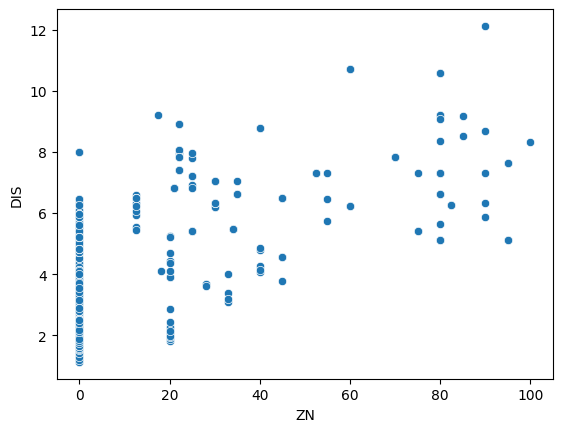

In [226]:
sns.scatterplot(x="ZN", y="DIS", data=data);

Dropping DIS since it's only 0.2 correlated with Price and quite correlated with another feature variable ZN.

In [227]:
#Dropping INDUS and DIS
columns_to_drop_2 = ['INDUS', 'DIS']
features2 = features1.drop(columns=columns_to_drop_2)
print(features2)

       ZN    NOX     RM   AGE  TAX  PTRATIO  LSTAT
0    18.0  0.538  6.575  65.2  296     15.3   4.98
1     0.0  0.469  6.421  78.9  242     17.8   9.14
2     0.0  0.469  7.185  61.1  242     17.8   4.03
3     0.0  0.458  6.998  45.8  222     18.7   2.94
4     0.0  0.458  7.147  54.2  222     18.7   5.33
..    ...    ...    ...   ...  ...      ...    ...
501   0.0  0.573  6.593  69.1  273     21.0   9.67
502   0.0  0.573  6.120  76.7  273     21.0   9.08
503   0.0  0.573  6.976  91.0  273     21.0   5.64
504   0.0  0.573  6.794  89.3  273     21.0   6.48
505   0.0  0.573  6.030  80.8  273     21.0   7.88

[506 rows x 7 columns]


In [228]:
x=features2
x

,ZN,NOX,RM,AGE,TAX,PTRATIO,LSTAT
0,18.0,0.538,6.575,65.2,296,15.3,4.98
1,0.0,0.469,6.421,78.9,242,17.8,9.14
2,0.0,0.469,7.185,61.1,242,17.8,4.03
3,0.0,0.458,6.998,45.8,222,18.7,2.94
4,0.0,0.458,7.147,54.2,222,18.7,5.33
...,...,...,...,...,...,...,...
501,0.0,0.573,6.593,69.1,273,21.0,9.67
502,0.0,0.573,6.120,76.7,273,21.0,9.08
503,0.0,0.573,6.976,91.0,273,21.0,5.64
504,0.0,0.573,6.794,89.3,273,21.0,6.48


In [229]:
y=data['Price']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [230]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [231]:
lr=LinearRegression()

In [232]:
lr.fit(x_train,y_train)
coefficients = lr.coef_
print(coefficients)

[ 5.25433507e-04 -6.01486935e+00  4.24349360e+00  2.80388392e-02
 -2.92428885e-03 -1.08486122e+00 -5.54301120e-01]


In [233]:
y_pred=lr.predict(x_train)

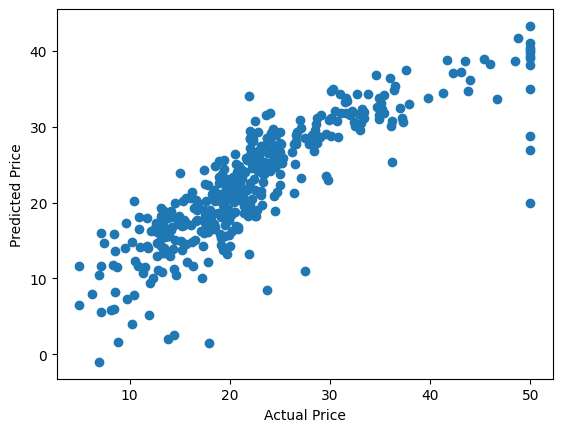

In [234]:
plt.scatter(y_train,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [235]:
mse=mean_squared_error(y_train,y_pred)
rmse=np.sqrt(mse)
r2=lr.score(x,y)

print("Linear Regression Model -1")
print("Feature Variable: ZN, NOX, RM, AGE, TAX, PTRATIO, LSTAT")
print("Target Variable: Price")
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R-Squared: ", r2)

Linear Regression Model -1
Feature Variable: ZN, NOX, RM, AGE, TAX, PTRATIO, LSTAT
Target Variable: Price
Mean Squared Error:  23.11399371065464
Root Mean Squared Error:  4.807701499745449
R-Squared:  0.6809929206378225


MODEL - 2
From the heatmap, we see AGE and NOX both to be highly correlated with each other and have weak negative correlation with the model so we'll eliminate one of them.


In [236]:
#Dropping AGE
columns_to_drop_3 = ['AGE']
features3 = features2.drop(columns=columns_to_drop_3)
print(features3)

       ZN    NOX     RM  TAX  PTRATIO  LSTAT
0    18.0  0.538  6.575  296     15.3   4.98
1     0.0  0.469  6.421  242     17.8   9.14
2     0.0  0.469  7.185  242     17.8   4.03
3     0.0  0.458  6.998  222     18.7   2.94
4     0.0  0.458  7.147  222     18.7   5.33
..    ...    ...    ...  ...      ...    ...
501   0.0  0.573  6.593  273     21.0   9.67
502   0.0  0.573  6.120  273     21.0   9.08
503   0.0  0.573  6.976  273     21.0   5.64
504   0.0  0.573  6.794  273     21.0   6.48
505   0.0  0.573  6.030  273     21.0   7.88

[506 rows x 6 columns]


In [237]:
x1=features3

In [238]:
y1=data['Price']

In [239]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2,random_state=5)

In [240]:
lr1=LinearRegression()

In [241]:
lr1.fit(x_train1,y_train1)

LinearRegression()

In [242]:
y_pred1=lr1.predict(x_train1)

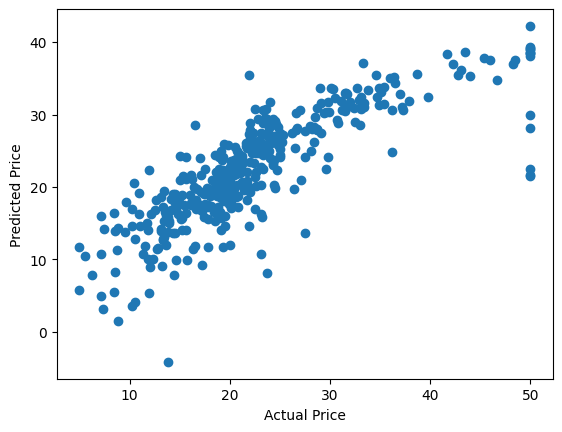

In [243]:
plt.scatter(y_train1,y_pred1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [244]:
mse1=mean_squared_error(y_train1,y_pred1)
rmse1=np.sqrt(mse1)
r2_1=lr1.score(x1,y1)

print("Linear Regression Model -2")
print("Feature Variable: ZN, NOX, RM, TAX, PTRATIO, LSTAT")
print("Target Variable: Price")
print("Mean Squared Error: ", mse1)
print("Root Mean Squared Error: ", rmse1)
print("R-Squared: ", r2_1)

Linear Regression Model -2
Feature Variable: ZN, NOX, RM, TAX, PTRATIO, LSTAT
Target Variable: Price
Mean Squared Error:  28.104236738387495
Root Mean Squared Error:  5.301342918392234
R-Squared:  0.6770142025802388


MODEL 3 - Eliminating only based on the least correlation with Target Variable.

In [245]:
columns_to_drop4= ['B','DIS','CHAS']
features4=features.drop(columns=columns_to_drop4)
print(features4)

        CRIM    ZN  INDUS    NOX     RM   AGE  RAD  TAX  PTRATIO  LSTAT
0    0.00632  18.0   2.31  0.538  6.575  65.2    1  296     15.3   4.98
1    0.02731   0.0   7.07  0.469  6.421  78.9    2  242     17.8   9.14
2    0.02729   0.0   7.07  0.469  7.185  61.1    2  242     17.8   4.03
3    0.03237   0.0   2.18  0.458  6.998  45.8    3  222     18.7   2.94
4    0.06905   0.0   2.18  0.458  7.147  54.2    3  222     18.7   5.33
..       ...   ...    ...    ...    ...   ...  ...  ...      ...    ...
501  0.06263   0.0  11.93  0.573  6.593  69.1    1  273     21.0   9.67
502  0.04527   0.0  11.93  0.573  6.120  76.7    1  273     21.0   9.08
503  0.06076   0.0  11.93  0.573  6.976  91.0    1  273     21.0   5.64
504  0.10959   0.0  11.93  0.573  6.794  89.3    1  273     21.0   6.48
505  0.04741   0.0  11.93  0.573  6.030  80.8    1  273     21.0   7.88

[506 rows x 10 columns]


In [246]:
x2=features4
y2=data['Price']

In [247]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2,random_state=5)

In [248]:
lr2=LinearRegression()
lr2.fit(x_train2,y_train2)

LinearRegression()

In [249]:
y_pred2=lr2.predict(x_train2)

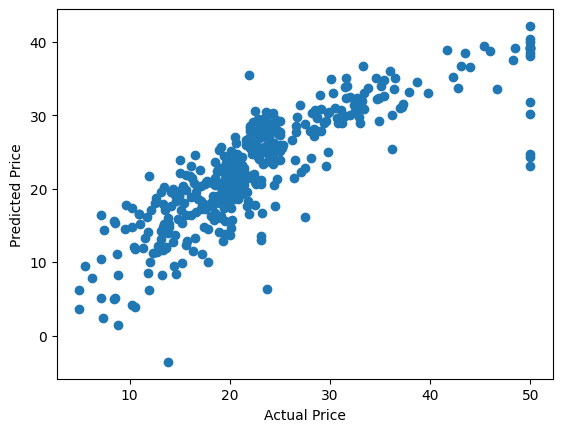

In [250]:
plt.scatter(y_train2,y_pred2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [251]:
mse2=mean_squared_error(y_train2,y_pred2)
rmse2=np.sqrt(mse2)
r2_2=lr2.score(x2,y2)

print("Linear Regression Model -3")
print("Feature Variable: CRIM, ZN, INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO, LSTAT")
print("Target Variable: Price")
print("Mean Squared Error: ", mse2)
print("Root Mean Squared Error: ", rmse2)
print("R-Squared: ", r2_2)

Linear Regression Model -3
Feature Variable: CRIM, ZN, INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO, LSTAT
Target Variable: Price
Mean Squared Error:  26.191933961485308
Root Mean Squared Error:  5.1178055806649505
R-Squared:  0.6950698992146922


Model 3 may seem to have lower Error value and higher R2 value but may be subject to overfitting.

MODEL 4 - In this Model, we shall only choose the most positively correlated feature RM and most negatively correlated feature variable LSTAT.

In [252]:
columns_to_drop5= ['CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B']
#didnot drop AGE and NOX as per multicollinearity
features5=features.drop(columns=columns_to_drop5)
print(features5)

        RM  LSTAT
0    6.575   4.98
1    6.421   9.14
2    7.185   4.03
3    6.998   2.94
4    7.147   5.33
..     ...    ...
501  6.593   9.67
502  6.120   9.08
503  6.976   5.64
504  6.794   6.48
505  6.030   7.88

[506 rows x 2 columns]


In [253]:
x3=features5
y3=data['Price']

In [254]:
x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,test_size=0.2,random_state=5)

In [255]:
lr3=LinearRegression()

In [256]:
lr3.fit(x_train3,y_train3)

LinearRegression()

In [257]:
y_pred3=lr3.predict(x_train3)

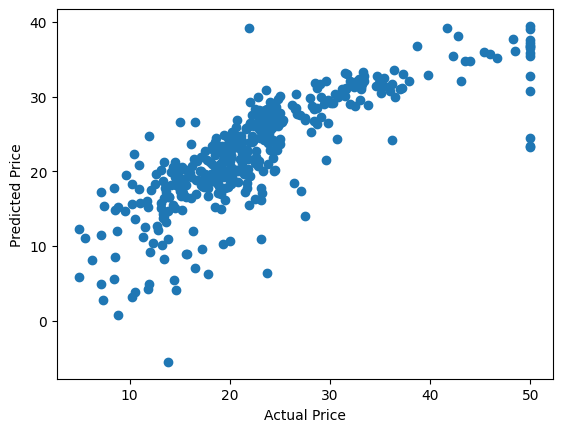

In [258]:
plt.scatter(y_train3,y_pred3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [259]:
mse3=mean_squared_error(y_train3,y_pred3)
rmse3=np.sqrt(mse3)
r2_3=lr3.score(x3,y3)

print("Linear Regression Model -4")
print("Feature Variable: RM, LSTAT")
print("Target Variable: Price")
print("Mean Squared Error: ", mse3)
print("Root Mean Squared Error: ", rmse3)
print("R-Squared: ", r2_3)

Linear Regression Model -4
Feature Variable: RM, LSTAT
Target Variable: Price
Mean Squared Error:  31.777227140320218
Root Mean Squared Error:  5.6371293350711955
R-Squared:  0.6364367726715208


MODEL 4 is not an accurate representation of how we actually want our model to perform.

Hence, Model 1, 2 and 3 seem to be good models.